In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model,Sequential

from keras.layers import Input, Dense,Flatten,Dropout,BatchNormalization,Activation,Bidirectional,LSTM
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.optimizers import SGD,Adam
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,plot_roc_curve
from sklearn import metrics
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fire/CDI_Based/Intensity/CSV/Gray.csv',index_col=0)


In [2]:
data=d

X_train, X_test = train_test_split(data, test_size=0.2, random_state=20)
Y_train,Y_test=X_train['Class'].values,X_test['Class'].values


X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
std =StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)
print('Test_Label Demension : ' + str(np.shape(Y_test)))

Test_Label Demension : (54,)


In [3]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
lr = 0.001
generations = 20000
num_gens_to_wait = 250
batch_size = 64
drop_out_rate = 0.5
input_shape = (28,1)

(214, 28, 1)


In [7]:
input_tensor = Input(shape=(input_shape))

x = layers.Conv1D(16, 4, padding='valid', activation='relu', strides=1)(input_tensor)
x = layers.Conv1D(16, 4, padding='valid', activation='relu', strides=1)(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(32, 5, padding='valid', activation='relu', strides=1)(x)
x = layers.Conv1D(32, 5, padding='valid', activation='relu', strides=1)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(drop_out_rate)(x)
output_tensor = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(input_tensor, output_tensor)

model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr = lr),
             metrics=['accuracy'])
model.summary()
checkpointer = ModelCheckpoint(filepath="1d+cnn.h5",
                               verbose=0,
                               save_best_only=True)
history = model.fit(X_train, Y_train,
                          epochs=300,
                          batch_size=64,
                          validation_data=(X_test, Y_test),
                          verbose=1, 
                          callbacks=[checkpointer]).history

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 1)]           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 25, 16)            80        
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 22, 16)            1040      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 11, 16)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 7, 32)             2592      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 3, 32)             5152      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)               

4/4 [==============================] - 0s 11ms/step - loss: 0.3352 - accuracy: 0.8692 - val_loss: 0.5720 - val_accuracy: 0.7407
Epoch 107/300
4/4 [==============================] - 0s 9ms/step - loss: 0.3246 - accuracy: 0.8785 - val_loss: 0.5725 - val_accuracy: 0.7407
Epoch 108/300
4/4 [==============================] - 0s 9ms/step - loss: 0.3234 - accuracy: 0.8925 - val_loss: 0.5839 - val_accuracy: 0.7407
Epoch 109/300
4/4 [==============================] - 0s 9ms/step - loss: 0.3407 - accuracy: 0.8832 - val_loss: 0.5783 - val_accuracy: 0.7593
Epoch 110/300
4/4 [==============================] - 0s 9ms/step - loss: 0.3341 - accuracy: 0.8879 - val_loss: 0.5735 - val_accuracy: 0.7593
Epoch 111/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3325 - accuracy: 0.8879 - val_loss: 0.5878 - val_accuracy: 0.7407
Epoch 112/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3159 - accuracy: 0.8879 - val_loss: 0.5852 - val_accuracy: 0.7778
Epoch 113/300
4/4 [=======

Epoch 164/300
4/4 [==============================] - 0s 9ms/step - loss: 0.2586 - accuracy: 0.9206 - val_loss: 0.5882 - val_accuracy: 0.7963
Epoch 165/300
4/4 [==============================] - 0s 11ms/step - loss: 0.2397 - accuracy: 0.9112 - val_loss: 0.6091 - val_accuracy: 0.7778
Epoch 166/300
4/4 [==============================] - 0s 11ms/step - loss: 0.2471 - accuracy: 0.9159 - val_loss: 0.6249 - val_accuracy: 0.7963
Epoch 167/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2478 - accuracy: 0.9112 - val_loss: 0.6456 - val_accuracy: 0.7963
Epoch 168/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2553 - accuracy: 0.9065 - val_loss: 0.6352 - val_accuracy: 0.7963
Epoch 169/300
4/4 [==============================] - 0s 8ms/step - loss: 0.2450 - accuracy: 0.9112 - val_loss: 0.6175 - val_accuracy: 0.7593
Epoch 170/300
4/4 [==============================] - 0s 9ms/step - loss: 0.2403 - accuracy: 0.9159 - val_loss: 0.6162 - val_accuracy: 0.7593
Epoch 171

Epoch 222/300
4/4 [==============================] - 0s 11ms/step - loss: 0.1856 - accuracy: 0.9346 - val_loss: 0.7337 - val_accuracy: 0.7963
Epoch 223/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1841 - accuracy: 0.9439 - val_loss: 0.7511 - val_accuracy: 0.7222
Epoch 224/300
4/4 [==============================] - 0s 11ms/step - loss: 0.1899 - accuracy: 0.9252 - val_loss: 0.7722 - val_accuracy: 0.7222
Epoch 225/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1872 - accuracy: 0.9346 - val_loss: 0.7073 - val_accuracy: 0.7778
Epoch 226/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1719 - accuracy: 0.9393 - val_loss: 0.7672 - val_accuracy: 0.7222
Epoch 227/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1814 - accuracy: 0.9346 - val_loss: 0.7822 - val_accuracy: 0.7778
Epoch 228/300
4/4 [==============================] - 0s 11ms/step - loss: 0.1848 - accuracy: 0.9299 - val_loss: 0.7562 - val_accuracy: 0.7778
Epoch 22

Epoch 280/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1322 - accuracy: 0.9486 - val_loss: 0.8849 - val_accuracy: 0.7593
Epoch 281/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1258 - accuracy: 0.9579 - val_loss: 0.8720 - val_accuracy: 0.7593
Epoch 282/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1374 - accuracy: 0.9439 - val_loss: 0.9504 - val_accuracy: 0.7593
Epoch 283/300
4/4 [==============================] - 0s 8ms/step - loss: 0.1290 - accuracy: 0.9533 - val_loss: 0.9909 - val_accuracy: 0.7593
Epoch 284/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1280 - accuracy: 0.9533 - val_loss: 0.9582 - val_accuracy: 0.7593
Epoch 285/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1289 - accuracy: 0.9533 - val_loss: 0.9137 - val_accuracy: 0.7593
Epoch 286/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1234 - accuracy: 0.9579 - val_loss: 0.8994 - val_accuracy: 0.7593
Epoch 287

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


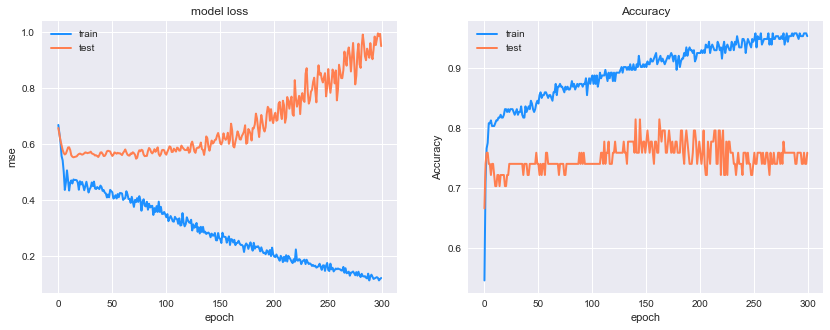

In [8]:

print(history.keys())

# 画出损失函数曲线
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(history['loss'], c='dodgerblue', lw=2)
plt.plot(history['val_loss'], c='coral', lw=2)
plt.title('model loss')
plt.ylabel('mse'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(history['accuracy'], c='dodgerblue', lw=2)
plt.plot(history['val_accuracy'], c='coral', lw=2)
plt.title('Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

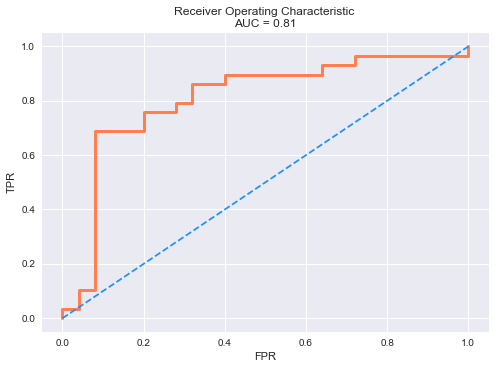

In [9]:
model = load_model('1d+cnn.h5')
y_prob = model.predict(X_test, verbose=0)
fpr_test,tpr_test,_ = roc_curve(Y_test,y_prob)     
auc_test = auc(fpr_test,tpr_test) 
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_test)   
plt.plot(fpr_test, tpr_test, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

Epoch 1/200
4/4 [==============================] - 0s 91ms/step - loss: 0.6407 - accuracy: 0.7056 - val_loss: 0.4944 - val_accuracy: 0.7778
Epoch 2/200
4/4 [==============================] - 0s 20ms/step - loss: 0.5083 - accuracy: 0.8037 - val_loss: 0.4781 - val_accuracy: 0.8148
Epoch 3/200
4/4 [==============================] - 0s 21ms/step - loss: 0.5108 - accuracy: 0.8037 - val_loss: 0.4489 - val_accuracy: 0.7778
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 0.4991 - accuracy: 0.7897 - val_loss: 0.4632 - val_accuracy: 0.7963
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 0.4892 - accuracy: 0.8037 - val_loss: 0.4524 - val_accuracy: 0.7778
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 0.4954 - accuracy: 0.8084 - val_loss: 0.4548 - val_accuracy: 0.7778
Epoch 7/200
4/4 [==============================] - 0s 8ms/step - loss: 0.4764 - accuracy: 0.7991 - val_loss: 0.4542 - val_accuracy: 0.7963
Epoch 8/200
4/4 [=======

4/4 [==============================] - 0s 10ms/step - loss: 0.0600 - accuracy: 0.9720 - val_loss: 1.8817 - val_accuracy: 0.7593
Epoch 118/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0526 - accuracy: 0.9813 - val_loss: 1.8188 - val_accuracy: 0.7963
Epoch 119/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0635 - accuracy: 0.9953 - val_loss: 1.9798 - val_accuracy: 0.7222
Epoch 120/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0435 - accuracy: 0.9860 - val_loss: 2.0591 - val_accuracy: 0.7407
Epoch 121/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0375 - accuracy: 0.9907 - val_loss: 1.9633 - val_accuracy: 0.7593
Epoch 122/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 1.9834 - val_accuracy: 0.7593
Epoch 123/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0300 - accuracy: 0.9907 - val_loss: 2.1443 - val_accuracy: 0.7593
Epoch 124/200
4/4 [=======

Epoch 175/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0099 - accuracy: 0.9953 - val_loss: 2.9419 - val_accuracy: 0.7778
Epoch 176/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0140 - accuracy: 0.9907 - val_loss: 2.9237 - val_accuracy: 0.7778
Epoch 177/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0103 - accuracy: 0.9953 - val_loss: 2.9427 - val_accuracy: 0.7778
Epoch 178/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 2.9778 - val_accuracy: 0.7778
Epoch 179/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0086 - accuracy: 0.9953 - val_loss: 3.0043 - val_accuracy: 0.7778
Epoch 180/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 0.9953 - val_loss: 3.0294 - val_accuracy: 0.7778
Epoch 181/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0095 - accuracy: 0.9953 - val_loss: 3.0210 - val_accuracy: 0.7778
Epoch 182/

Epoch 28/200
4/4 [==============================] - 0s 8ms/step - loss: 0.4074 - accuracy: 0.8411 - val_loss: 0.5693 - val_accuracy: 0.7593
Epoch 29/200
4/4 [==============================] - 0s 8ms/step - loss: 0.3890 - accuracy: 0.8364 - val_loss: 0.5410 - val_accuracy: 0.8148
Epoch 30/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3975 - accuracy: 0.8084 - val_loss: 0.5769 - val_accuracy: 0.7593
Epoch 31/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3827 - accuracy: 0.8411 - val_loss: 0.5973 - val_accuracy: 0.7593
Epoch 32/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3667 - accuracy: 0.8551 - val_loss: 0.6162 - val_accuracy: 0.7963
Epoch 33/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3649 - accuracy: 0.8411 - val_loss: 0.5984 - val_accuracy: 0.7778
Epoch 34/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3493 - accuracy: 0.8645 - val_loss: 0.5716 - val_accuracy: 0.7593
Epoch 35/200
4/4 [==

4/4 [==============================] - 0s 8ms/step - loss: 0.0168 - accuracy: 0.9907 - val_loss: 3.3036 - val_accuracy: 0.6481
Epoch 145/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0205 - accuracy: 0.9907 - val_loss: 3.3162 - val_accuracy: 0.6667
Epoch 146/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.9860 - val_loss: 3.4544 - val_accuracy: 0.7407
Epoch 147/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0126 - accuracy: 0.9953 - val_loss: 3.5346 - val_accuracy: 0.7222
Epoch 148/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0117 - accuracy: 0.9953 - val_loss: 3.6425 - val_accuracy: 0.7222
Epoch 149/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0142 - accuracy: 0.9907 - val_loss: 3.9742 - val_accuracy: 0.7222
Epoch 150/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0102 - accuracy: 0.9953 - val_loss: 4.2428 - val_accuracy: 0.7407
Epoch 151/200
4/4 [========

Epoch 1/200
4/4 [==============================] - 0s 52ms/step - loss: 0.6336 - accuracy: 0.7056 - val_loss: 0.4543 - val_accuracy: 0.7963
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 0.4982 - accuracy: 0.7991 - val_loss: 0.4381 - val_accuracy: 0.7778
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 0.4863 - accuracy: 0.8084 - val_loss: 0.5843 - val_accuracy: 0.6852
Epoch 4/200
4/4 [==============================] - 0s 7ms/step - loss: 0.5410 - accuracy: 0.7383 - val_loss: 0.4818 - val_accuracy: 0.7963
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 0.5180 - accuracy: 0.7944 - val_loss: 0.4498 - val_accuracy: 0.7778
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 0.5002 - accuracy: 0.7897 - val_loss: 0.4554 - val_accuracy: 0.7778
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 0.4918 - accuracy: 0.8224 - val_loss: 0.4725 - val_accuracy: 0.7593
Epoch 8/200
4/4 [========

4/4 [==============================] - 0s 14ms/step - loss: 0.0561 - accuracy: 0.9860 - val_loss: 1.3479 - val_accuracy: 0.7778
Epoch 118/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0491 - accuracy: 0.9813 - val_loss: 1.5696 - val_accuracy: 0.8148
Epoch 119/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0543 - accuracy: 0.9813 - val_loss: 1.4589 - val_accuracy: 0.7963
Epoch 120/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0349 - accuracy: 0.9860 - val_loss: 1.5053 - val_accuracy: 0.7963
Epoch 121/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0370 - accuracy: 0.9860 - val_loss: 1.5324 - val_accuracy: 0.7778
Epoch 122/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0616 - accuracy: 0.9766 - val_loss: 1.9072 - val_accuracy: 0.7963
Epoch 123/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0527 - accuracy: 0.9860 - val_loss: 2.5970 - val_accuracy: 0.7593
Epoch 124/200
4/4 [=======

Epoch 175/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0098 - accuracy: 0.9907 - val_loss: 2.6031 - val_accuracy: 0.7778
Epoch 176/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0155 - accuracy: 0.9907 - val_loss: 2.6507 - val_accuracy: 0.7778
Epoch 177/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0103 - accuracy: 0.9953 - val_loss: 2.6163 - val_accuracy: 0.7963
Epoch 178/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0124 - accuracy: 0.9953 - val_loss: 2.5364 - val_accuracy: 0.8148
Epoch 179/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.9953 - val_loss: 2.4839 - val_accuracy: 0.8148
Epoch 180/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0082 - accuracy: 0.9953 - val_loss: 2.4576 - val_accuracy: 0.8148
Epoch 181/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.9953 - val_loss: 2.4713 - val_accuracy: 0.7963
Epoch 182/20

Epoch 28/200
4/4 [==============================] - 0s 9ms/step - loss: 0.3810 - accuracy: 0.8465 - val_loss: 0.8209 - val_accuracy: 0.7547
Epoch 29/200
4/4 [==============================] - 0s 9ms/step - loss: 0.3818 - accuracy: 0.8558 - val_loss: 0.6564 - val_accuracy: 0.7925
Epoch 30/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3591 - accuracy: 0.8791 - val_loss: 0.6932 - val_accuracy: 0.7547
Epoch 31/200
4/4 [==============================] - 0s 9ms/step - loss: 0.3731 - accuracy: 0.8605 - val_loss: 0.7400 - val_accuracy: 0.7547
Epoch 32/200
4/4 [==============================] - 0s 14ms/step - loss: 0.3636 - accuracy: 0.8651 - val_loss: 0.6095 - val_accuracy: 0.7547
Epoch 33/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3439 - accuracy: 0.8837 - val_loss: 0.7546 - val_accuracy: 0.7358
Epoch 34/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3658 - accuracy: 0.8558 - val_loss: 0.7327 - val_accuracy: 0.7547
Epoch 35/200
4/4 

4/4 [==============================] - 0s 10ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 2.5898 - val_accuracy: 0.6981
Epoch 145/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.5484 - val_accuracy: 0.7736
Epoch 146/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.5447 - val_accuracy: 0.7736
Epoch 147/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.5697 - val_accuracy: 0.7736
Epoch 148/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.5916 - val_accuracy: 0.7736
Epoch 149/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.6272 - val_accuracy: 0.7736
Epoch 150/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.6851 - val_accuracy: 0.7547
Epoch 151/200
4/4 [=======

Epoch 1/200
4/4 [==============================] - 0s 64ms/step - loss: 0.6539 - accuracy: 0.6930 - val_loss: 0.4883 - val_accuracy: 0.8302
Epoch 2/200
4/4 [==============================] - 0s 30ms/step - loss: 0.5070 - accuracy: 0.7814 - val_loss: 0.4020 - val_accuracy: 0.8491
Epoch 3/200
4/4 [==============================] - 0s 14ms/step - loss: 0.5514 - accuracy: 0.7814 - val_loss: 0.4042 - val_accuracy: 0.8491
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 0.5042 - accuracy: 0.7814 - val_loss: 0.4364 - val_accuracy: 0.8302
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 0.4997 - accuracy: 0.7907 - val_loss: 0.4514 - val_accuracy: 0.8302
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.4950 - accuracy: 0.7907 - val_loss: 0.4283 - val_accuracy: 0.8302
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 0.4862 - accuracy: 0.7814 - val_loss: 0.4098 - val_accuracy: 0.8302
Epoch 8/200
4/4 [======

4/4 [==============================] - 0s 8ms/step - loss: 0.2051 - accuracy: 0.9256 - val_loss: 1.4761 - val_accuracy: 0.7925
Epoch 118/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2157 - accuracy: 0.9302 - val_loss: 1.4058 - val_accuracy: 0.7736
Epoch 119/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1694 - accuracy: 0.9349 - val_loss: 1.5436 - val_accuracy: 0.7925
Epoch 120/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1460 - accuracy: 0.9395 - val_loss: 1.2506 - val_accuracy: 0.8113
Epoch 121/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1521 - accuracy: 0.9442 - val_loss: 1.7441 - val_accuracy: 0.7170
Epoch 122/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1649 - accuracy: 0.9349 - val_loss: 1.4204 - val_accuracy: 0.7925
Epoch 123/200
4/4 [==============================] - 0s 15ms/step - loss: 0.1341 - accuracy: 0.9488 - val_loss: 1.1785 - val_accuracy: 0.8302
Epoch 124/200
4/4 [======

Epoch 175/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0105 - accuracy: 0.9953 - val_loss: 2.1900 - val_accuracy: 0.7736
Epoch 176/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 2.2707 - val_accuracy: 0.7736
Epoch 177/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 2.3123 - val_accuracy: 0.7736
Epoch 178/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 2.3494 - val_accuracy: 0.7736
Epoch 179/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 2.4226 - val_accuracy: 0.7736
Epoch 180/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.5513 - val_accuracy: 0.7736
Epoch 181/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 2.5328 - val_accuracy: 0.7736
Epoch 182/

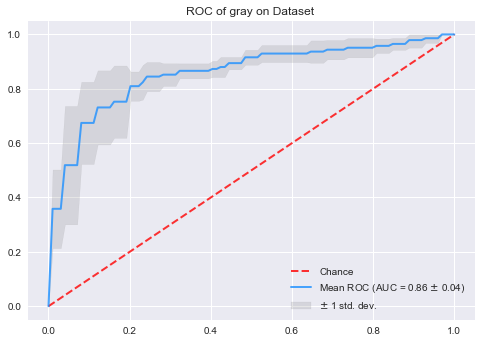

In [34]:
from sklearn.model_selection import StratifiedKFold
data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/'+'Fire/'+'/CDI_Based/Intensity/CSV/'+'Gray'+'.csv',index_col=0)

y=data['Class'].values
X=data.drop(['Class'], axis=1).values
#X = X.reshape(X.shape[0], X.shape[1], 1)
cv = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    std =StandardScaler()
    X_train=std.fit_transform(X[train])
    X_test=std.transform(X[test])
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    input_tensor = Input(shape=(input_shape))

    x = layers.Conv1D(128, 5, padding='valid', activation='relu', strides=1)(input_tensor)
    x = layers.Conv1D(128, 5, padding='valid', activation='relu', strides=1)(x)
    x = layers.MaxPooling1D(2)(x)
    x = layers.Conv1D(256, 3, padding='valid', activation='relu', strides=1)(x)
    x = layers.Conv1D(256, 3, padding='valid', activation='relu', strides=1)(x)
    x = layers.MaxPooling1D(2)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(drop_out_rate)(x)
    #x = layers.Flatten()(x)
    x = layers.Dense(100, activation='relu')(x)
    output_tensor = layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(input_tensor, output_tensor)

    model.compile(loss='binary_crossentropy',
                         optimizer=Adam(lr = lr),
                         metrics=['accuracy'])
    checkpointer = ModelCheckpoint(filepath="1d+cnn.h5",
                               verbose=0,
                               save_best_only=True)
    history=model.fit(X_train, y[train],
                epochs=200,
                batch_size=64,
                validation_data=(X_test, y[test]),
                verbose=1,
                callbacks=[checkpointer]).history
    model=load_model('1d+cnn.h5')
    y_prob = model.predict(X_test, verbose=0)
    fpr_test,tpr_test,_ = roc_curve(y[test],y_prob)     
    auc_test = auc(fpr_test,tpr_test)  
    interp_tpr = np.interp(mean_fpr,fpr_test, tpr_test)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(auc_test)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='dodgerblue',label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title='ROC of gray'+ ' on Dataset ')
ax.legend(loc="lower right")
plt.show()


Epoch 1/200
4/4 [==============================] - 0s 80ms/step - loss: 0.6517 - accuracy: 0.6355 - val_loss: 0.5747 - val_accuracy: 0.8148
Epoch 2/200
4/4 [==============================] - 0s 21ms/step - loss: 0.5015 - accuracy: 0.7804 - val_loss: 0.5329 - val_accuracy: 0.8148
Epoch 3/200
4/4 [==============================] - 0s 22ms/step - loss: 0.4709 - accuracy: 0.8037 - val_loss: 0.5138 - val_accuracy: 0.8148
Epoch 4/200
4/4 [==============================] - 0s 22ms/step - loss: 0.4679 - accuracy: 0.7991 - val_loss: 0.5014 - val_accuracy: 0.8148
Epoch 5/200
4/4 [==============================] - 0s 20ms/step - loss: 0.4421 - accuracy: 0.8224 - val_loss: 0.4985 - val_accuracy: 0.7963
Epoch 6/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4362 - accuracy: 0.8224 - val_loss: 0.4972 - val_accuracy: 0.7963
Epoch 7/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4221 - accuracy: 0.8131 - val_loss: 0.4975 - val_accuracy: 0.7963
Epoch 8/200
4/4 [===

4/4 [==============================] - 0s 8ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.7747 - val_accuracy: 0.7593
Epoch 118/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0179 - accuracy: 0.9953 - val_loss: 0.7675 - val_accuracy: 0.7778
Epoch 119/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0350 - accuracy: 0.9860 - val_loss: 0.7557 - val_accuracy: 0.7593
Epoch 120/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0337 - accuracy: 0.9860 - val_loss: 0.7567 - val_accuracy: 0.7963
Epoch 121/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0154 - accuracy: 0.9953 - val_loss: 0.8777 - val_accuracy: 0.7593
Epoch 122/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0277 - accuracy: 0.9907 - val_loss: 0.8634 - val_accuracy: 0.7778
Epoch 123/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0413 - accuracy: 0.9813 - val_loss: 0.9284 - val_accuracy: 0.7778
Epoch 124/200
4/4 [======

4/4 [==============================] - 0s 8ms/step - loss: 0.0113 - accuracy: 0.9953 - val_loss: 1.0401 - val_accuracy: 0.8519
Epoch 176/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0167 - accuracy: 0.9953 - val_loss: 1.0460 - val_accuracy: 0.8333
Epoch 177/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0167 - accuracy: 0.9907 - val_loss: 1.0738 - val_accuracy: 0.8148
Epoch 178/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0165 - accuracy: 0.9907 - val_loss: 1.0700 - val_accuracy: 0.8519
Epoch 179/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.9953 - val_loss: 1.0978 - val_accuracy: 0.8519
Epoch 180/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0127 - accuracy: 0.9953 - val_loss: 1.1155 - val_accuracy: 0.8333
Epoch 181/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 1.0912 - val_accuracy: 0.8333
Epoch 182/200
4/4 [=====

Epoch 28/200
4/4 [==============================] - ETA: 0s - loss: 0.1366 - accuracy: 0.96 - 0s 10ms/step - loss: 0.1816 - accuracy: 0.9393 - val_loss: 0.6240 - val_accuracy: 0.6667
Epoch 29/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1679 - accuracy: 0.9486 - val_loss: 0.6240 - val_accuracy: 0.6667
Epoch 30/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1521 - accuracy: 0.9533 - val_loss: 0.6251 - val_accuracy: 0.6481
Epoch 31/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1504 - accuracy: 0.9439 - val_loss: 0.6300 - val_accuracy: 0.6667
Epoch 32/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1813 - accuracy: 0.9393 - val_loss: 0.6384 - val_accuracy: 0.7037
Epoch 33/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1604 - accuracy: 0.9486 - val_loss: 0.6372 - val_accuracy: 0.6481
Epoch 34/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1662 - accuracy: 0.9439 - val_loss: 0.6241

4/4 [==============================] - 0s 8ms/step - loss: 0.0185 - accuracy: 0.9907 - val_loss: 1.3534 - val_accuracy: 0.6667
Epoch 145/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0555 - accuracy: 0.9813 - val_loss: 1.3846 - val_accuracy: 0.7778
Epoch 146/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0282 - accuracy: 0.9860 - val_loss: 1.3356 - val_accuracy: 0.7222
Epoch 147/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0114 - accuracy: 0.9953 - val_loss: 1.3419 - val_accuracy: 0.6667
Epoch 148/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0192 - accuracy: 0.9953 - val_loss: 1.4487 - val_accuracy: 0.6667
Epoch 149/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0176 - accuracy: 0.9953 - val_loss: 1.5485 - val_accuracy: 0.6852
Epoch 150/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0281 - accuracy: 0.9953 - val_loss: 1.4569 - val_accuracy: 0.6481
Epoch 151/200
4/4 [=====

Epoch 1/200
4/4 [==============================] - 0s 68ms/step - loss: 0.5923 - accuracy: 0.6776 - val_loss: 0.5997 - val_accuracy: 0.8889
Epoch 2/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4711 - accuracy: 0.7944 - val_loss: 0.5533 - val_accuracy: 0.8704
Epoch 3/200
4/4 [==============================] - 0s 22ms/step - loss: 0.4515 - accuracy: 0.8131 - val_loss: 0.5349 - val_accuracy: 0.8519
Epoch 4/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4133 - accuracy: 0.8318 - val_loss: 0.5259 - val_accuracy: 0.8704
Epoch 5/200
4/4 [==============================] - 0s 20ms/step - loss: 0.4311 - accuracy: 0.8271 - val_loss: 0.5210 - val_accuracy: 0.8333
Epoch 6/200
4/4 [==============================] - 0s 21ms/step - loss: 0.3870 - accuracy: 0.8364 - val_loss: 0.5171 - val_accuracy: 0.8333
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.3823 - accuracy: 0.8458 - val_loss: 0.5172 - val_accuracy: 0.8148
Epoch 8/200
4/4 [===

4/4 [==============================] - 0s 9ms/step - loss: 0.0286 - accuracy: 0.9907 - val_loss: 1.3580 - val_accuracy: 0.6852
Epoch 118/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0163 - accuracy: 0.9953 - val_loss: 1.4161 - val_accuracy: 0.6667
Epoch 119/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0185 - accuracy: 0.9953 - val_loss: 1.4314 - val_accuracy: 0.6667
Epoch 120/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.9907 - val_loss: 1.4121 - val_accuracy: 0.6481
Epoch 121/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0231 - accuracy: 0.9953 - val_loss: 1.3679 - val_accuracy: 0.6481
Epoch 122/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0186 - accuracy: 0.9907 - val_loss: 1.3206 - val_accuracy: 0.7037
Epoch 123/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0166 - accuracy: 0.9953 - val_loss: 1.3158 - val_accuracy: 0.7037
Epoch 124/200
4/4 [======

4/4 [==============================] - 0s 9ms/step - loss: 0.0208 - accuracy: 0.9907 - val_loss: 2.0805 - val_accuracy: 0.5926
Epoch 176/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.9953 - val_loss: 2.0288 - val_accuracy: 0.5926
Epoch 177/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0127 - accuracy: 0.9953 - val_loss: 2.0710 - val_accuracy: 0.5926
Epoch 178/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0101 - accuracy: 0.9953 - val_loss: 2.1050 - val_accuracy: 0.5926
Epoch 179/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0122 - accuracy: 0.9907 - val_loss: 2.1294 - val_accuracy: 0.5926
Epoch 180/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 2.1448 - val_accuracy: 0.5926
Epoch 181/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 0.9953 - val_loss: 2.1480 - val_accuracy: 0.5926
Epoch 182/200
4/4 [=======

Epoch 28/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1888 - accuracy: 0.9395 - val_loss: 1.3621 - val_accuracy: 0.5094
Epoch 29/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1773 - accuracy: 0.9442 - val_loss: 1.4098 - val_accuracy: 0.4906
Epoch 30/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1673 - accuracy: 0.9349 - val_loss: 1.3984 - val_accuracy: 0.4906
Epoch 31/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1683 - accuracy: 0.9581 - val_loss: 1.4304 - val_accuracy: 0.4906
Epoch 32/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1694 - accuracy: 0.9488 - val_loss: 1.3939 - val_accuracy: 0.5094
Epoch 33/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1551 - accuracy: 0.9442 - val_loss: 1.3147 - val_accuracy: 0.5283
Epoch 34/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1142 - accuracy: 0.9814 - val_loss: 1.2768 - val_accuracy: 0.5283
Epoch 35/200


Epoch 144/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.8680 - val_accuracy: 0.7358
Epoch 145/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 0.9907 - val_loss: 1.7920 - val_accuracy: 0.7358
Epoch 146/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 1.7030 - val_accuracy: 0.7547
Epoch 147/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 1.6583 - val_accuracy: 0.7547
Epoch 148/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 1.6591 - val_accuracy: 0.7358
Epoch 149/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.6888 - val_accuracy: 0.7547
Epoch 150/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.7605 - val_accuracy: 0.7547
Epoch 151

Epoch 1/200
4/4 [==============================] - 0s 64ms/step - loss: 0.6389 - accuracy: 0.6326 - val_loss: 0.5777 - val_accuracy: 0.8113
Epoch 2/200
4/4 [==============================] - 0s 20ms/step - loss: 0.5075 - accuracy: 0.7907 - val_loss: 0.5300 - val_accuracy: 0.7736
Epoch 3/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4644 - accuracy: 0.7953 - val_loss: 0.5080 - val_accuracy: 0.8113
Epoch 4/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4697 - accuracy: 0.8186 - val_loss: 0.4984 - val_accuracy: 0.8302
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 0.4384 - accuracy: 0.8140 - val_loss: 0.4989 - val_accuracy: 0.8113
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.4360 - accuracy: 0.8233 - val_loss: 0.5110 - val_accuracy: 0.8113
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.3981 - accuracy: 0.8419 - val_loss: 0.5228 - val_accuracy: 0.8302
Epoch 8/200
4/4 [====

4/4 [==============================] - 0s 10ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.8873 - val_accuracy: 0.7736
Epoch 118/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.8800 - val_accuracy: 0.7736
Epoch 119/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.8756 - val_accuracy: 0.7925
Epoch 120/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.8901 - val_accuracy: 0.7925
Epoch 121/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0124 - accuracy: 0.9953 - val_loss: 0.9181 - val_accuracy: 0.7925
Epoch 122/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.9426 - val_accuracy: 0.7925
Epoch 123/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.9655 - val_accuracy: 0.7925
Epoch 124/200
4/4 [====

Epoch 175/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 1.3945 - val_accuracy: 0.7925
Epoch 176/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0593 - accuracy: 0.9721 - val_loss: 1.4923 - val_accuracy: 0.7358
Epoch 177/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0424 - accuracy: 0.9860 - val_loss: 1.5113 - val_accuracy: 0.7547
Epoch 178/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0354 - accuracy: 0.9860 - val_loss: 1.4975 - val_accuracy: 0.7736
Epoch 179/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0467 - accuracy: 0.9814 - val_loss: 1.5335 - val_accuracy: 0.7547
Epoch 180/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0444 - accuracy: 0.9767 - val_loss: 1.5367 - val_accuracy: 0.7547
Epoch 181/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0274 - accuracy: 0.9907 - val_loss: 1.5326 - val_accuracy: 0.7547
Epoch 182/200

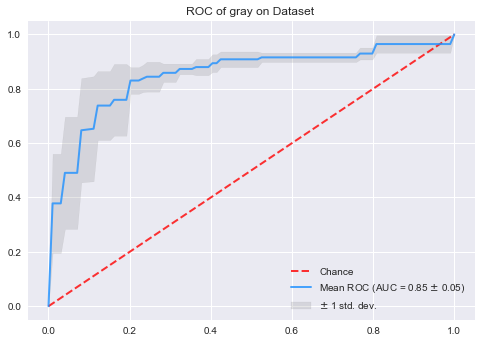

In [33]:
from sklearn.model_selection import StratifiedKFold
data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/'+'Fire/'+'/CDI_Based/Intensity/CSV/'+'Gray'+'.csv',index_col=0)

y=data['Class'].values
X=data.drop(['Class'], axis=1).values
#X = X.reshape(X.shape[0], X.shape[1], 1)
cv = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    std =StandardScaler()
    X_train=std.fit_transform(X[train])
    X_test=std.transform(X[test])
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    model = Sequential()
    intput_shape=(X_train.shape[1], 1)
    model.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Conv1D(128,kernel_size=3,padding = 'same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Flatten())
    model.add(Dense(64, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                         optimizer=Adam(lr = lr),
                         metrics=['accuracy'])
    checkpointer = ModelCheckpoint(filepath="1d+cnn.h5",
                               verbose=0,
                               save_best_only=True)
    history=model.fit(X_train, y[train],
                epochs=200,
                batch_size=64,
                validation_data=(X_test, y[test]),
                verbose=1,
                callbacks=[checkpointer]).history
    model=load_model('1d+cnn.h5')
    y_prob = model.predict(X_test, verbose=0)
    fpr_test,tpr_test,_ = roc_curve(y[test],y_prob)     
    auc_test = auc(fpr_test,tpr_test)  
    interp_tpr = np.interp(mean_fpr,fpr_test, tpr_test)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(auc_test)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='dodgerblue',label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title='ROC of gray'+ ' on Dataset ')
ax.legend(loc="lower right")
plt.show()


Epoch 1/200
4/4 [==============================] - 1s 215ms/step - loss: 0.7147 - accuracy: 0.5000 - val_loss: 0.5729 - val_accuracy: 0.8333
Epoch 2/200
4/4 [==============================] - 0s 21ms/step - loss: 0.6425 - accuracy: 0.6262 - val_loss: 0.5043 - val_accuracy: 0.8333
Epoch 3/200
4/4 [==============================] - 0s 28ms/step - loss: 0.5995 - accuracy: 0.6869 - val_loss: 0.4528 - val_accuracy: 0.8519
Epoch 4/200
4/4 [==============================] - 0s 27ms/step - loss: 0.5710 - accuracy: 0.6822 - val_loss: 0.3968 - val_accuracy: 0.8333
Epoch 5/200
4/4 [==============================] - 0s 27ms/step - loss: 0.5166 - accuracy: 0.7523 - val_loss: 0.3796 - val_accuracy: 0.8519
Epoch 6/200
4/4 [==============================] - 0s 28ms/step - loss: 0.5464 - accuracy: 0.7617 - val_loss: 0.3792 - val_accuracy: 0.8148
Epoch 7/200
4/4 [==============================] - 0s 27ms/step - loss: 0.4784 - accuracy: 0.7850 - val_loss: 0.3455 - val_accuracy: 0.8333
Epoch 8/200
4/4 [==

4/4 [==============================] - 0s 12ms/step - loss: 0.4324 - accuracy: 0.7897 - val_loss: 0.3959 - val_accuracy: 0.8333
Epoch 60/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4181 - accuracy: 0.8271 - val_loss: 0.3620 - val_accuracy: 0.8704
Epoch 61/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4597 - accuracy: 0.7850 - val_loss: 0.3501 - val_accuracy: 0.8519
Epoch 62/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4756 - accuracy: 0.7944 - val_loss: 0.3869 - val_accuracy: 0.8519
Epoch 63/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4416 - accuracy: 0.7991 - val_loss: 0.3597 - val_accuracy: 0.8519
Epoch 64/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4735 - accuracy: 0.7991 - val_loss: 0.3576 - val_accuracy: 0.8519
Epoch 65/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4403 - accuracy: 0.7991 - val_loss: 0.3684 - val_accuracy: 0.8519
Epoch 66/200
4/4 [========

4/4 [==============================] - 0s 13ms/step - loss: 0.4224 - accuracy: 0.8131 - val_loss: 0.3834 - val_accuracy: 0.8704
Epoch 118/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4758 - accuracy: 0.7757 - val_loss: 0.4266 - val_accuracy: 0.7778
Epoch 119/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4050 - accuracy: 0.8411 - val_loss: 0.3716 - val_accuracy: 0.8704
Epoch 120/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4256 - accuracy: 0.8037 - val_loss: 0.3585 - val_accuracy: 0.8704
Epoch 121/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4509 - accuracy: 0.7944 - val_loss: 0.4248 - val_accuracy: 0.7963
Epoch 122/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4481 - accuracy: 0.7991 - val_loss: 0.4230 - val_accuracy: 0.7963
Epoch 123/200
4/4 [==============================] - 0s 14ms/step - loss: 0.4036 - accuracy: 0.8178 - val_loss: 0.3612 - val_accuracy: 0.8704
Epoch 124/200
4/4 [=

Epoch 175/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4126 - accuracy: 0.7944 - val_loss: 0.3814 - val_accuracy: 0.8704
Epoch 176/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3963 - accuracy: 0.8364 - val_loss: 0.3966 - val_accuracy: 0.8704
Epoch 177/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4268 - accuracy: 0.8271 - val_loss: 0.4320 - val_accuracy: 0.8148
Epoch 178/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4016 - accuracy: 0.8084 - val_loss: 0.3579 - val_accuracy: 0.8704
Epoch 179/200
4/4 [==============================] - 0s 17ms/step - loss: 0.4299 - accuracy: 0.8318 - val_loss: 0.3569 - val_accuracy: 0.8704
Epoch 180/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4055 - accuracy: 0.7944 - val_loss: 0.3841 - val_accuracy: 0.8333
Epoch 181/200
4/4 [==============================] - 0s 18ms/step - loss: 0.4071 - accuracy: 0.8178 - val_loss: 0.4056 - val_accuracy: 0.8148
Epoch 

4/4 [==============================] - 0s 16ms/step - loss: 0.4274 - accuracy: 0.8178 - val_loss: 0.4842 - val_accuracy: 0.8333
Epoch 28/200
4/4 [==============================] - 0s 17ms/step - loss: 0.4775 - accuracy: 0.8178 - val_loss: 0.4839 - val_accuracy: 0.8148
Epoch 29/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4638 - accuracy: 0.7850 - val_loss: 0.4870 - val_accuracy: 0.8148
Epoch 30/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4201 - accuracy: 0.7944 - val_loss: 0.4838 - val_accuracy: 0.8148
Epoch 31/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4520 - accuracy: 0.7944 - val_loss: 0.4815 - val_accuracy: 0.8148
Epoch 32/200
4/4 [==============================] - 0s 10ms/step - loss: 0.4587 - accuracy: 0.7850 - val_loss: 0.4800 - val_accuracy: 0.8519
Epoch 33/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4298 - accuracy: 0.8131 - val_loss: 0.4758 - val_accuracy: 0.8148
Epoch 34/200
4/4 [========

4/4 [==============================] - 0s 16ms/step - loss: 0.4125 - accuracy: 0.8131 - val_loss: 0.5968 - val_accuracy: 0.8148
Epoch 86/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4037 - accuracy: 0.7804 - val_loss: 0.6047 - val_accuracy: 0.8519
Epoch 87/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4133 - accuracy: 0.8318 - val_loss: 0.6100 - val_accuracy: 0.7963
Epoch 88/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3926 - accuracy: 0.8178 - val_loss: 0.6031 - val_accuracy: 0.7963
Epoch 89/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4059 - accuracy: 0.8084 - val_loss: 0.6046 - val_accuracy: 0.8148
Epoch 90/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4003 - accuracy: 0.8224 - val_loss: 0.6008 - val_accuracy: 0.8148
Epoch 91/200
4/4 [==============================] - 0s 14ms/step - loss: 0.3771 - accuracy: 0.8084 - val_loss: 0.6028 - val_accuracy: 0.8333
Epoch 92/200
4/4 [========

Epoch 143/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4195 - accuracy: 0.8318 - val_loss: 0.6972 - val_accuracy: 0.8333
Epoch 144/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4093 - accuracy: 0.7850 - val_loss: 0.7066 - val_accuracy: 0.7778
Epoch 145/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4157 - accuracy: 0.8131 - val_loss: 0.6892 - val_accuracy: 0.7778
Epoch 146/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4092 - accuracy: 0.7944 - val_loss: 0.6671 - val_accuracy: 0.8148
Epoch 147/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3580 - accuracy: 0.8505 - val_loss: 0.6604 - val_accuracy: 0.8519
Epoch 148/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3929 - accuracy: 0.8131 - val_loss: 0.6605 - val_accuracy: 0.8148
Epoch 149/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3908 - accuracy: 0.8131 - val_loss: 0.6679 - val_accuracy: 0.7963
Epoch 

Epoch 1/200
4/4 [==============================] - 1s 214ms/step - loss: 0.6464 - accuracy: 0.6355 - val_loss: 0.5649 - val_accuracy: 0.7778
Epoch 2/200
4/4 [==============================] - 0s 20ms/step - loss: 0.6214 - accuracy: 0.6402 - val_loss: 0.5237 - val_accuracy: 0.7963
Epoch 3/200
4/4 [==============================] - 0s 20ms/step - loss: 0.5593 - accuracy: 0.7243 - val_loss: 0.4730 - val_accuracy: 0.7963
Epoch 4/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5507 - accuracy: 0.7336 - val_loss: 0.4453 - val_accuracy: 0.7963
Epoch 5/200
4/4 [==============================] - 0s 22ms/step - loss: 0.5028 - accuracy: 0.7850 - val_loss: 0.4211 - val_accuracy: 0.7963
Epoch 6/200
4/4 [==============================] - 0s 22ms/step - loss: 0.4618 - accuracy: 0.8131 - val_loss: 0.4133 - val_accuracy: 0.8333
Epoch 7/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4987 - accuracy: 0.7944 - val_loss: 0.4193 - val_accuracy: 0.7963
Epoch 8/200
4/4 [==

Epoch 54/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4506 - accuracy: 0.8037 - val_loss: 0.4107 - val_accuracy: 0.7963
Epoch 55/200
4/4 [==============================] - 0s 14ms/step - loss: 0.3972 - accuracy: 0.8084 - val_loss: 0.4135 - val_accuracy: 0.8333
Epoch 56/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4346 - accuracy: 0.7991 - val_loss: 0.4188 - val_accuracy: 0.8148
Epoch 57/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4425 - accuracy: 0.7757 - val_loss: 0.4232 - val_accuracy: 0.7963
Epoch 58/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4219 - accuracy: 0.8224 - val_loss: 0.4262 - val_accuracy: 0.7963
Epoch 59/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4225 - accuracy: 0.8037 - val_loss: 0.4244 - val_accuracy: 0.7963
Epoch 60/200
4/4 [==============================] - 0s 14ms/step - loss: 0.4119 - accuracy: 0.8178 - val_loss: 0.4258 - val_accuracy: 0.7963
Epoch 61/200


4/4 [==============================] - 0s 10ms/step - loss: 0.4432 - accuracy: 0.8037 - val_loss: 0.5002 - val_accuracy: 0.8148
Epoch 113/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3997 - accuracy: 0.8271 - val_loss: 0.4987 - val_accuracy: 0.8148
Epoch 114/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3830 - accuracy: 0.8364 - val_loss: 0.5072 - val_accuracy: 0.7593
Epoch 115/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4124 - accuracy: 0.8364 - val_loss: 0.5079 - val_accuracy: 0.7963
Epoch 116/200
4/4 [==============================] - ETA: 0s - loss: 0.3669 - accuracy: 0.85 - 0s 14ms/step - loss: 0.3832 - accuracy: 0.8318 - val_loss: 0.5152 - val_accuracy: 0.7593
Epoch 117/200
4/4 [==============================] - 0s 10ms/step - loss: 0.4270 - accuracy: 0.8037 - val_loss: 0.5310 - val_accuracy: 0.7407
Epoch 118/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4000 - accuracy: 0.8178 - val_loss: 0.5184 -

4/4 [==============================] - 0s 10ms/step - loss: 0.3699 - accuracy: 0.8224 - val_loss: 0.5421 - val_accuracy: 0.7778
Epoch 170/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3800 - accuracy: 0.8458 - val_loss: 0.5505 - val_accuracy: 0.7593
Epoch 171/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3604 - accuracy: 0.8364 - val_loss: 0.5664 - val_accuracy: 0.7963
Epoch 172/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3613 - accuracy: 0.8458 - val_loss: 0.5670 - val_accuracy: 0.7407
Epoch 173/200
4/4 [==============================] - 0s 10ms/step - loss: 0.3793 - accuracy: 0.8551 - val_loss: 0.5673 - val_accuracy: 0.7407
Epoch 174/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4099 - accuracy: 0.7944 - val_loss: 0.5627 - val_accuracy: 0.7963
Epoch 175/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3990 - accuracy: 0.8271 - val_loss: 0.5593 - val_accuracy: 0.7778
Epoch 176/200
4/4 [=

4/4 [==============================] - 0s 12ms/step - loss: 0.4315 - accuracy: 0.8047 - val_loss: 0.5498 - val_accuracy: 0.8113
Epoch 22/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4049 - accuracy: 0.8047 - val_loss: 0.5911 - val_accuracy: 0.7925
Epoch 23/200
4/4 [==============================] - 0s 14ms/step - loss: 0.4259 - accuracy: 0.8047 - val_loss: 0.6251 - val_accuracy: 0.7736
Epoch 24/200
4/4 [==============================] - 0s 14ms/step - loss: 0.4824 - accuracy: 0.7488 - val_loss: 0.5895 - val_accuracy: 0.7736
Epoch 25/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4416 - accuracy: 0.8186 - val_loss: 0.5450 - val_accuracy: 0.7736
Epoch 26/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4430 - accuracy: 0.8047 - val_loss: 0.5817 - val_accuracy: 0.7736
Epoch 27/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4709 - accuracy: 0.7674 - val_loss: 0.6075 - val_accuracy: 0.7547
Epoch 28/200
4/4 [========

4/4 [==============================] - 0s 14ms/step - loss: 0.4468 - accuracy: 0.7814 - val_loss: 0.7389 - val_accuracy: 0.7736
Epoch 80/200
4/4 [==============================] - 0s 14ms/step - loss: 0.3900 - accuracy: 0.8093 - val_loss: 0.7197 - val_accuracy: 0.8302
Epoch 81/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4277 - accuracy: 0.8093 - val_loss: 0.7070 - val_accuracy: 0.8113
Epoch 82/200
4/4 [==============================] - 0s 14ms/step - loss: 0.4278 - accuracy: 0.8093 - val_loss: 0.6960 - val_accuracy: 0.7736
Epoch 83/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3804 - accuracy: 0.8372 - val_loss: 0.6593 - val_accuracy: 0.8113
Epoch 84/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4147 - accuracy: 0.8233 - val_loss: 0.6632 - val_accuracy: 0.8302
Epoch 85/200
4/4 [==============================] - 0s 15ms/step - loss: 0.3941 - accuracy: 0.8372 - val_loss: 0.6794 - val_accuracy: 0.7736
Epoch 86/200
4/4 [========

Epoch 137/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3924 - accuracy: 0.8047 - val_loss: 0.7938 - val_accuracy: 0.8302
Epoch 138/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4112 - accuracy: 0.8047 - val_loss: 0.8124 - val_accuracy: 0.8113
Epoch 139/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4103 - accuracy: 0.8140 - val_loss: 0.8116 - val_accuracy: 0.8113
Epoch 140/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3738 - accuracy: 0.8233 - val_loss: 0.8096 - val_accuracy: 0.8113
Epoch 141/200
4/4 [==============================] - 0s 11ms/step - loss: 0.4081 - accuracy: 0.8233 - val_loss: 0.8633 - val_accuracy: 0.7925
Epoch 142/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3886 - accuracy: 0.8279 - val_loss: 0.8409 - val_accuracy: 0.7736
Epoch 143/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3944 - accuracy: 0.8093 - val_loss: 0.8194 - val_accuracy: 0.8113
Epoch 

Epoch 195/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4135 - accuracy: 0.7953 - val_loss: 0.8387 - val_accuracy: 0.8302
Epoch 196/200
4/4 [==============================] - 0s 14ms/step - loss: 0.4062 - accuracy: 0.8093 - val_loss: 0.8455 - val_accuracy: 0.8113
Epoch 197/200
4/4 [==============================] - 0s 14ms/step - loss: 0.3677 - accuracy: 0.8186 - val_loss: 0.8694 - val_accuracy: 0.7925
Epoch 198/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4253 - accuracy: 0.8047 - val_loss: 0.8948 - val_accuracy: 0.7925
Epoch 199/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4019 - accuracy: 0.8140 - val_loss: 0.8417 - val_accuracy: 0.8113
Epoch 200/200
4/4 [==============================] - 0s 16ms/step - loss: 0.3950 - accuracy: 0.7953 - val_loss: 0.8737 - val_accuracy: 0.8113
Epoch 1/200
4/4 [==============================] - 1s 213ms/step - loss: 0.6641 - accuracy: 0.5814 - val_loss: 0.6260 - val_accuracy: 0.5472
Epoch 2

Epoch 48/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4495 - accuracy: 0.7628 - val_loss: 0.4987 - val_accuracy: 0.7925
Epoch 49/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4246 - accuracy: 0.7907 - val_loss: 0.4884 - val_accuracy: 0.7547
Epoch 50/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4112 - accuracy: 0.8233 - val_loss: 0.4930 - val_accuracy: 0.7358
Epoch 51/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4323 - accuracy: 0.8186 - val_loss: 0.4813 - val_accuracy: 0.8113
Epoch 52/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4355 - accuracy: 0.8047 - val_loss: 0.5090 - val_accuracy: 0.7547
Epoch 53/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4254 - accuracy: 0.8047 - val_loss: 0.4838 - val_accuracy: 0.8113
Epoch 54/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4184 - accuracy: 0.8000 - val_loss: 0.4831 - val_accuracy: 0.7925
Epoch 55/200


4/4 [==============================] - 0s 12ms/step - loss: 0.4020 - accuracy: 0.8326 - val_loss: 0.5207 - val_accuracy: 0.7925
Epoch 107/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4105 - accuracy: 0.8279 - val_loss: 0.5455 - val_accuracy: 0.7925
Epoch 108/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4084 - accuracy: 0.8419 - val_loss: 0.5504 - val_accuracy: 0.7736
Epoch 109/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3904 - accuracy: 0.8326 - val_loss: 0.5334 - val_accuracy: 0.7925
Epoch 110/200
4/4 [==============================] - 0s 15ms/step - loss: 0.3822 - accuracy: 0.8372 - val_loss: 0.5299 - val_accuracy: 0.7358
Epoch 111/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4186 - accuracy: 0.8093 - val_loss: 0.5216 - val_accuracy: 0.7925
Epoch 112/200
4/4 [==============================] - 0s 14ms/step - loss: 0.4065 - accuracy: 0.8140 - val_loss: 0.5315 - val_accuracy: 0.7736
Epoch 113/200
4/4 [=

Epoch 164/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3771 - accuracy: 0.8372 - val_loss: 0.5358 - val_accuracy: 0.7736
Epoch 165/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3760 - accuracy: 0.8372 - val_loss: 0.5356 - val_accuracy: 0.7358
Epoch 166/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3858 - accuracy: 0.8372 - val_loss: 0.5411 - val_accuracy: 0.7547
Epoch 167/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3629 - accuracy: 0.8465 - val_loss: 0.5223 - val_accuracy: 0.7736
Epoch 168/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3583 - accuracy: 0.8186 - val_loss: 0.5158 - val_accuracy: 0.7925
Epoch 169/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3602 - accuracy: 0.8233 - val_loss: 0.5206 - val_accuracy: 0.7736
Epoch 170/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3320 - accuracy: 0.8605 - val_loss: 0.5024 - val_accuracy: 0.7925
Epoch 

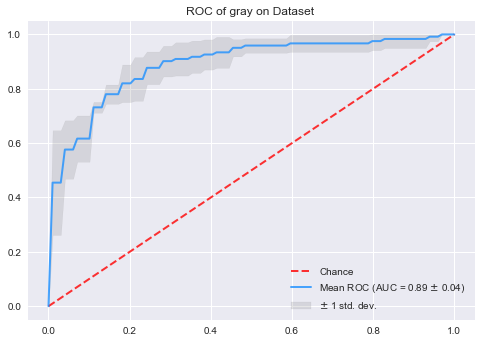

In [8]:
from sklearn.model_selection import StratifiedKFold
#data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/'+'Theft/'+'/CDI_Based/Intensity/CSV/'+'Optical_Mag'+'.csv',index_col=0)
data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+'Burglary'+'/Optical_Mag.csv',index_col=0)

y=data['Class'].values
X=data.drop(['Class'], axis=1).values
#X = X.reshape(X.shape[0], X.shape[1], 1)
cv = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
#     std =StandardScaler()
#     X_train=std.fit_transform(X[train])
#     X_test=std.transform(X[test])
    X_train,X_test=X[train],X[test]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    model = Sequential()
    model.add(
        Bidirectional(
          LSTM(
              units=128,
              input_shape=[X_train.shape[1], X_train.shape[2]]
          )
        )
    )
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                         optimizer=Adam(lr = lr),
                         metrics=['accuracy'])
    checkpointer = ModelCheckpoint(filepath="1d+cnn.h5",
                               verbose=0,
                               save_best_only=True)
    history=model.fit(X_train, y[train],
                epochs=200,
                batch_size=64,
                validation_data=(X_test, y[test]),
                verbose=1,
                callbacks=[checkpointer]).history
    model=load_model('1d+cnn.h5')
    y_prob = model.predict(X_test, verbose=0)
    fpr_test,tpr_test,_ = roc_curve(y[test],y_prob)     
    auc_test = auc(fpr_test,tpr_test)  
    interp_tpr = np.interp(mean_fpr,fpr_test, tpr_test)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(auc_test)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='dodgerblue',label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title='ROC of gray'+ ' on Dataset ')
ax.legend(loc="lower right")
plt.show()


Epoch 1/200
4/4 [==============================] - 1s 230ms/step - loss: 0.8100 - accuracy: 0.4579 - val_loss: 0.6707 - val_accuracy: 0.5741
Epoch 2/200
4/4 [==============================] - 0s 14ms/step - loss: 0.6756 - accuracy: 0.5794 - val_loss: 0.6885 - val_accuracy: 0.5370
Epoch 3/200
4/4 [==============================] - 0s 24ms/step - loss: 0.6761 - accuracy: 0.5935 - val_loss: 0.6330 - val_accuracy: 0.6111
Epoch 4/200
4/4 [==============================] - 0s 28ms/step - loss: 0.6233 - accuracy: 0.6869 - val_loss: 0.5392 - val_accuracy: 0.7963
Epoch 5/200
4/4 [==============================] - 0s 24ms/step - loss: 0.5651 - accuracy: 0.7243 - val_loss: 0.5056 - val_accuracy: 0.8148
Epoch 6/200
4/4 [==============================] - 0s 25ms/step - loss: 0.5806 - accuracy: 0.7570 - val_loss: 0.4817 - val_accuracy: 0.8333
Epoch 7/200
4/4 [==============================] - 0s 23ms/step - loss: 0.5738 - accuracy: 0.7336 - val_loss: 0.4697 - val_accuracy: 0.8333
Epoch 8/200
4/4 [==

4/4 [==============================] - 0s 25ms/step - loss: 0.5236 - accuracy: 0.7617 - val_loss: 0.4152 - val_accuracy: 0.8148
Epoch 60/200
4/4 [==============================] - 0s 55ms/step - loss: 0.5462 - accuracy: 0.7430 - val_loss: 0.4129 - val_accuracy: 0.8333
Epoch 61/200
4/4 [==============================] - 0s 70ms/step - loss: 0.5161 - accuracy: 0.7710 - val_loss: 0.4153 - val_accuracy: 0.8333
Epoch 62/200
4/4 [==============================] - 0s 49ms/step - loss: 0.4879 - accuracy: 0.7523 - val_loss: 0.4158 - val_accuracy: 0.8333
Epoch 63/200
4/4 [==============================] - 0s 60ms/step - loss: 0.5150 - accuracy: 0.7336 - val_loss: 0.4144 - val_accuracy: 0.8333
Epoch 64/200
4/4 [==============================] - 0s 37ms/step - loss: 0.5080 - accuracy: 0.7430 - val_loss: 0.4134 - val_accuracy: 0.8333
Epoch 65/200
4/4 [==============================] - 0s 111ms/step - loss: 0.5262 - accuracy: 0.7523 - val_loss: 0.4134 - val_accuracy: 0.8333
Epoch 66/200
4/4 [=======

4/4 [==============================] - 0s 16ms/step - loss: 0.5215 - accuracy: 0.7336 - val_loss: 0.4252 - val_accuracy: 0.8333
Epoch 118/200
4/4 [==============================] - 0s 15ms/step - loss: 0.5190 - accuracy: 0.7336 - val_loss: 0.4254 - val_accuracy: 0.8148
Epoch 119/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5029 - accuracy: 0.7570 - val_loss: 0.4256 - val_accuracy: 0.8148
Epoch 120/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5144 - accuracy: 0.7710 - val_loss: 0.4245 - val_accuracy: 0.8148
Epoch 121/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4841 - accuracy: 0.7477 - val_loss: 0.4225 - val_accuracy: 0.8148
Epoch 122/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4999 - accuracy: 0.7617 - val_loss: 0.4204 - val_accuracy: 0.7963
Epoch 123/200
4/4 [==============================] - 0s 15ms/step - loss: 0.5420 - accuracy: 0.7430 - val_loss: 0.4188 - val_accuracy: 0.8148
Epoch 124/200
4/4 [=

Epoch 175/200
4/4 [==============================] - 0s 18ms/step - loss: 0.5199 - accuracy: 0.7523 - val_loss: 0.4338 - val_accuracy: 0.8148
Epoch 176/200
4/4 [==============================] - 0s 20ms/step - loss: 0.4787 - accuracy: 0.7664 - val_loss: 0.4294 - val_accuracy: 0.8333
Epoch 177/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4724 - accuracy: 0.7897 - val_loss: 0.4291 - val_accuracy: 0.8333
Epoch 178/200
4/4 [==============================] - 0s 18ms/step - loss: 0.5189 - accuracy: 0.7430 - val_loss: 0.4271 - val_accuracy: 0.8148
Epoch 179/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4911 - accuracy: 0.7710 - val_loss: 0.4234 - val_accuracy: 0.8333
Epoch 180/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4741 - accuracy: 0.7804 - val_loss: 0.4239 - val_accuracy: 0.8333
Epoch 181/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4873 - accuracy: 0.7477 - val_loss: 0.4254 - val_accuracy: 0.8333
Epoch 

4/4 [==============================] - 0s 15ms/step - loss: 0.4719 - accuracy: 0.7617 - val_loss: 0.5615 - val_accuracy: 0.7407
Epoch 28/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4617 - accuracy: 0.7710 - val_loss: 0.5729 - val_accuracy: 0.7593
Epoch 29/200
4/4 [==============================] - 0s 18ms/step - loss: 0.5242 - accuracy: 0.7290 - val_loss: 0.5522 - val_accuracy: 0.6852
Epoch 30/200
4/4 [==============================] - 0s 22ms/step - loss: 0.5056 - accuracy: 0.7617 - val_loss: 0.5475 - val_accuracy: 0.7222
Epoch 31/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5212 - accuracy: 0.7336 - val_loss: 0.5474 - val_accuracy: 0.6852
Epoch 32/200
4/4 [==============================] - 0s 17ms/step - loss: 0.4953 - accuracy: 0.7523 - val_loss: 0.5458 - val_accuracy: 0.7037
Epoch 33/200
4/4 [==============================] - 0s 17ms/step - loss: 0.4656 - accuracy: 0.7570 - val_loss: 0.5450 - val_accuracy: 0.7037
Epoch 34/200
4/4 [========

4/4 [==============================] - 0s 31ms/step - loss: 0.4804 - accuracy: 0.7664 - val_loss: 0.5343 - val_accuracy: 0.6667
Epoch 86/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5009 - accuracy: 0.7430 - val_loss: 0.5351 - val_accuracy: 0.6852
Epoch 87/200
4/4 [==============================] - 0s 17ms/step - loss: 0.4696 - accuracy: 0.7664 - val_loss: 0.5361 - val_accuracy: 0.7037
Epoch 88/200
4/4 [==============================] - 0s 18ms/step - loss: 0.4561 - accuracy: 0.7897 - val_loss: 0.5365 - val_accuracy: 0.6852
Epoch 89/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4763 - accuracy: 0.7710 - val_loss: 0.5359 - val_accuracy: 0.7037
Epoch 90/200
4/4 [==============================] - 0s 18ms/step - loss: 0.4623 - accuracy: 0.7570 - val_loss: 0.5375 - val_accuracy: 0.7037
Epoch 91/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4657 - accuracy: 0.7804 - val_loss: 0.5365 - val_accuracy: 0.7037
Epoch 92/200
4/4 [========

Epoch 143/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4351 - accuracy: 0.8084 - val_loss: 0.5362 - val_accuracy: 0.6852
Epoch 144/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4765 - accuracy: 0.7664 - val_loss: 0.5447 - val_accuracy: 0.7037
Epoch 145/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4673 - accuracy: 0.7664 - val_loss: 0.5441 - val_accuracy: 0.7037
Epoch 146/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4477 - accuracy: 0.7944 - val_loss: 0.5432 - val_accuracy: 0.6852
Epoch 147/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4703 - accuracy: 0.7664 - val_loss: 0.5392 - val_accuracy: 0.6852
Epoch 148/200
4/4 [==============================] - 0s 23ms/step - loss: 0.4064 - accuracy: 0.8131 - val_loss: 0.5385 - val_accuracy: 0.6667
Epoch 149/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4279 - accuracy: 0.7944 - val_loss: 0.5392 - val_accuracy: 0.6852
Epoch 

Epoch 1/200
4/4 [==============================] - 1s 315ms/step - loss: 0.7420 - accuracy: 0.5280 - val_loss: 0.6784 - val_accuracy: 0.6667
Epoch 2/200
4/4 [==============================] - 0s 28ms/step - loss: 0.6526 - accuracy: 0.6215 - val_loss: 0.6296 - val_accuracy: 0.6852
Epoch 3/200
4/4 [==============================] - 0s 25ms/step - loss: 0.6078 - accuracy: 0.7009 - val_loss: 0.5851 - val_accuracy: 0.7222
Epoch 4/200
4/4 [==============================] - 0s 26ms/step - loss: 0.5481 - accuracy: 0.7290 - val_loss: 0.5615 - val_accuracy: 0.7593
Epoch 5/200
4/4 [==============================] - 0s 31ms/step - loss: 0.5478 - accuracy: 0.6916 - val_loss: 0.5475 - val_accuracy: 0.7222
Epoch 6/200
4/4 [==============================] - 0s 30ms/step - loss: 0.5049 - accuracy: 0.7477 - val_loss: 0.5451 - val_accuracy: 0.7222
Epoch 7/200
4/4 [==============================] - 0s 18ms/step - loss: 0.5179 - accuracy: 0.7523 - val_loss: 0.5528 - val_accuracy: 0.7037
Epoch 8/200
4/4 [==

Epoch 54/200
4/4 [==============================] - 0s 13ms/step - loss: 0.5067 - accuracy: 0.7477 - val_loss: 0.5351 - val_accuracy: 0.7407
Epoch 55/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4927 - accuracy: 0.7757 - val_loss: 0.5462 - val_accuracy: 0.7037
Epoch 56/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4922 - accuracy: 0.7710 - val_loss: 0.5510 - val_accuracy: 0.7037
Epoch 57/200
4/4 [==============================] - 0s 17ms/step - loss: 0.4658 - accuracy: 0.7944 - val_loss: 0.5406 - val_accuracy: 0.7037
Epoch 58/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4999 - accuracy: 0.7710 - val_loss: 0.5298 - val_accuracy: 0.7593
Epoch 59/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4810 - accuracy: 0.7757 - val_loss: 0.5308 - val_accuracy: 0.7593
Epoch 60/200
4/4 [==============================] - 0s 14ms/step - loss: 0.4998 - accuracy: 0.7243 - val_loss: 0.5304 - val_accuracy: 0.7593
Epoch 61/200


4/4 [==============================] - 0s 27ms/step - loss: 0.4557 - accuracy: 0.7710 - val_loss: 0.5259 - val_accuracy: 0.7222
Epoch 113/200
4/4 [==============================] - 0s 35ms/step - loss: 0.4779 - accuracy: 0.7477 - val_loss: 0.5252 - val_accuracy: 0.7222
Epoch 114/200
4/4 [==============================] - 0s 33ms/step - loss: 0.4328 - accuracy: 0.7991 - val_loss: 0.5230 - val_accuracy: 0.7407
Epoch 115/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4609 - accuracy: 0.7617 - val_loss: 0.5233 - val_accuracy: 0.7222
Epoch 116/200
4/4 [==============================] - 0s 34ms/step - loss: 0.4495 - accuracy: 0.7944 - val_loss: 0.5228 - val_accuracy: 0.7222
Epoch 117/200
4/4 [==============================] - 0s 30ms/step - loss: 0.4929 - accuracy: 0.7383 - val_loss: 0.5220 - val_accuracy: 0.7593
Epoch 118/200
4/4 [==============================] - 0s 27ms/step - loss: 0.4679 - accuracy: 0.7617 - val_loss: 0.5216 - val_accuracy: 0.7593
Epoch 119/200
4/4 [=

Epoch 170/200
4/4 [==============================] - 0s 18ms/step - loss: 0.4620 - accuracy: 0.7850 - val_loss: 0.5287 - val_accuracy: 0.7222
Epoch 171/200
4/4 [==============================] - 0s 18ms/step - loss: 0.4582 - accuracy: 0.7710 - val_loss: 0.5236 - val_accuracy: 0.7037
Epoch 172/200
4/4 [==============================] - 0s 36ms/step - loss: 0.4339 - accuracy: 0.7757 - val_loss: 0.5207 - val_accuracy: 0.7407
Epoch 173/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4538 - accuracy: 0.7944 - val_loss: 0.5210 - val_accuracy: 0.7407
Epoch 174/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4550 - accuracy: 0.7897 - val_loss: 0.5212 - val_accuracy: 0.7593
Epoch 175/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4193 - accuracy: 0.8131 - val_loss: 0.5216 - val_accuracy: 0.7407
Epoch 176/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4183 - accuracy: 0.8131 - val_loss: 0.5233 - val_accuracy: 0.7037
Epoch 

4/4 [==============================] - 0s 14ms/step - loss: 0.5127 - accuracy: 0.7674 - val_loss: 0.6113 - val_accuracy: 0.6415
Epoch 23/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5143 - accuracy: 0.7395 - val_loss: 0.6608 - val_accuracy: 0.6415
Epoch 24/200
4/4 [==============================] - 0s 15ms/step - loss: 0.5573 - accuracy: 0.7209 - val_loss: 0.6416 - val_accuracy: 0.6415
Epoch 25/200
4/4 [==============================] - 0s 15ms/step - loss: 0.5184 - accuracy: 0.7349 - val_loss: 0.6027 - val_accuracy: 0.6415
Epoch 26/200
4/4 [==============================] - 0s 17ms/step - loss: 0.5166 - accuracy: 0.7116 - val_loss: 0.5985 - val_accuracy: 0.6981
Epoch 27/200
4/4 [==============================] - 0s 18ms/step - loss: 0.5433 - accuracy: 0.7116 - val_loss: 0.6075 - val_accuracy: 0.6415
Epoch 28/200
4/4 [==============================] - 0s 15ms/step - loss: 0.5021 - accuracy: 0.7442 - val_loss: 0.6156 - val_accuracy: 0.6415
Epoch 29/200
4/4 [========

4/4 [==============================] - 0s 22ms/step - loss: 0.5174 - accuracy: 0.7535 - val_loss: 0.6312 - val_accuracy: 0.6792
Epoch 81/200
4/4 [==============================] - 0s 25ms/step - loss: 0.4955 - accuracy: 0.7721 - val_loss: 0.6358 - val_accuracy: 0.6604
Epoch 82/200
4/4 [==============================] - 0s 20ms/step - loss: 0.4983 - accuracy: 0.7767 - val_loss: 0.6315 - val_accuracy: 0.6792
Epoch 83/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5022 - accuracy: 0.7674 - val_loss: 0.6270 - val_accuracy: 0.6792
Epoch 84/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4909 - accuracy: 0.7814 - val_loss: 0.6257 - val_accuracy: 0.6792
Epoch 85/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4739 - accuracy: 0.7581 - val_loss: 0.6244 - val_accuracy: 0.6981
Epoch 86/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5067 - accuracy: 0.7535 - val_loss: 0.6263 - val_accuracy: 0.6792
Epoch 87/200
4/4 [========

Epoch 138/200
4/4 [==============================] - 0s 22ms/step - loss: 0.5019 - accuracy: 0.7442 - val_loss: 0.6181 - val_accuracy: 0.7170
Epoch 139/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4821 - accuracy: 0.7488 - val_loss: 0.6164 - val_accuracy: 0.7170
Epoch 140/200
4/4 [==============================] - 0s 22ms/step - loss: 0.5000 - accuracy: 0.7349 - val_loss: 0.6201 - val_accuracy: 0.6981
Epoch 141/200
4/4 [==============================] - 0s 26ms/step - loss: 0.4897 - accuracy: 0.7302 - val_loss: 0.6222 - val_accuracy: 0.6981
Epoch 142/200
4/4 [==============================] - 0s 26ms/step - loss: 0.5202 - accuracy: 0.7721 - val_loss: 0.6171 - val_accuracy: 0.7170
Epoch 143/200
4/4 [==============================] - 0s 23ms/step - loss: 0.4893 - accuracy: 0.7674 - val_loss: 0.6221 - val_accuracy: 0.6604
Epoch 144/200
4/4 [==============================] - 0s 20ms/step - loss: 0.5059 - accuracy: 0.7581 - val_loss: 0.6183 - val_accuracy: 0.7170
Epoch 

Epoch 196/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4629 - accuracy: 0.7814 - val_loss: 0.6306 - val_accuracy: 0.6792
Epoch 197/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4744 - accuracy: 0.7442 - val_loss: 0.6315 - val_accuracy: 0.6981
Epoch 198/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4653 - accuracy: 0.7628 - val_loss: 0.6312 - val_accuracy: 0.7170
Epoch 199/200
4/4 [==============================] - 0s 18ms/step - loss: 0.4835 - accuracy: 0.7628 - val_loss: 0.6312 - val_accuracy: 0.7170
Epoch 200/200
4/4 [==============================] - 0s 21ms/step - loss: 0.5009 - accuracy: 0.7628 - val_loss: 0.6313 - val_accuracy: 0.7170
Epoch 1/200
4/4 [==============================] - 1s 272ms/step - loss: 0.6925 - accuracy: 0.5535 - val_loss: 0.6570 - val_accuracy: 0.6038
Epoch 2/200
4/4 [==============================] - 0s 26ms/step - loss: 0.6764 - accuracy: 0.5581 - val_loss: 0.6394 - val_accuracy: 0.6038
Epoch 3/2

Epoch 49/200
4/4 [==============================] - 0s 17ms/step - loss: 0.5608 - accuracy: 0.7209 - val_loss: 0.4908 - val_accuracy: 0.7736
Epoch 50/200
4/4 [==============================] - 0s 23ms/step - loss: 0.5479 - accuracy: 0.7209 - val_loss: 0.4947 - val_accuracy: 0.7736
Epoch 51/200
4/4 [==============================] - 0s 20ms/step - loss: 0.5652 - accuracy: 0.6977 - val_loss: 0.4990 - val_accuracy: 0.8113
Epoch 52/200
4/4 [==============================] - 0s 17ms/step - loss: 0.5420 - accuracy: 0.7163 - val_loss: 0.5093 - val_accuracy: 0.8113
Epoch 53/200
4/4 [==============================] - 0s 20ms/step - loss: 0.5828 - accuracy: 0.6884 - val_loss: 0.5119 - val_accuracy: 0.7925
Epoch 54/200
4/4 [==============================] - 0s 17ms/step - loss: 0.5443 - accuracy: 0.6977 - val_loss: 0.4975 - val_accuracy: 0.7925
Epoch 55/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5557 - accuracy: 0.7023 - val_loss: 0.4910 - val_accuracy: 0.7170
Epoch 56/200


4/4 [==============================] - 0s 19ms/step - loss: 0.5562 - accuracy: 0.7070 - val_loss: 0.4770 - val_accuracy: 0.7736
Epoch 108/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5433 - accuracy: 0.7302 - val_loss: 0.4862 - val_accuracy: 0.8113
Epoch 109/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5392 - accuracy: 0.7349 - val_loss: 0.4782 - val_accuracy: 0.7736
Epoch 110/200
4/4 [==============================] - 0s 17ms/step - loss: 0.5363 - accuracy: 0.7209 - val_loss: 0.4777 - val_accuracy: 0.7736
Epoch 111/200
4/4 [==============================] - 0s 17ms/step - loss: 0.5528 - accuracy: 0.7070 - val_loss: 0.4788 - val_accuracy: 0.7736
Epoch 112/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5161 - accuracy: 0.7302 - val_loss: 0.4784 - val_accuracy: 0.7736
Epoch 113/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5638 - accuracy: 0.7023 - val_loss: 0.4775 - val_accuracy: 0.7736
Epoch 114/200
4/4 [=

Epoch 165/200
4/4 [==============================] - 0s 15ms/step - loss: 0.5444 - accuracy: 0.7209 - val_loss: 0.4852 - val_accuracy: 0.7736
Epoch 166/200
4/4 [==============================] - 0s 15ms/step - loss: 0.5451 - accuracy: 0.7163 - val_loss: 0.4896 - val_accuracy: 0.7925
Epoch 167/200
4/4 [==============================] - 0s 13ms/step - loss: 0.5383 - accuracy: 0.7256 - val_loss: 0.4892 - val_accuracy: 0.7925
Epoch 168/200
4/4 [==============================] - 0s 13ms/step - loss: 0.5328 - accuracy: 0.7302 - val_loss: 0.4860 - val_accuracy: 0.7925
Epoch 169/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5565 - accuracy: 0.6884 - val_loss: 0.4829 - val_accuracy: 0.7736
Epoch 170/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5798 - accuracy: 0.7116 - val_loss: 0.4825 - val_accuracy: 0.7547
Epoch 171/200
4/4 [==============================] - 0s 17ms/step - loss: 0.5586 - accuracy: 0.6930 - val_loss: 0.4816 - val_accuracy: 0.7547
Epoch 

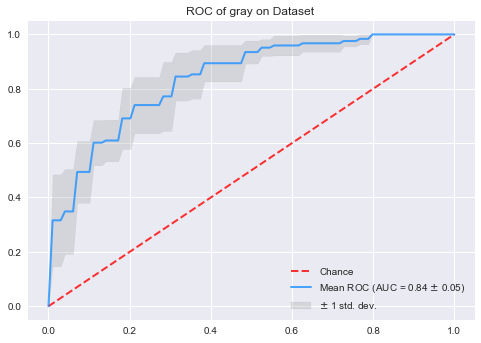

In [12]:
dataset_name='Burglary'
from sklearn.model_selection import StratifiedKFold
#data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/'+'Theft/'+'/CDI_Based/Intensity/CSV/'+'Optical_Mag'+'.csv',index_col=0)

Gray_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Gray.csv',index_col=0)
Gray_data=Gray_data.drop(['27'], axis=1)
Canny_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Canny.csv',index_col=0)
Canny_data=Canny_data.drop(['27'], axis=1)
Laplacian_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Laplacian.csv',index_col=0)
Laplacian_data=Laplacian_data.drop(['27'], axis=1)
Harris_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Harris.csv',index_col=0)
Harris_data=Harris_data.drop(['27'], axis=1)
Optical_Ang_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Optical_Ang.csv',index_col=0)
Optical_Mag_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Optical_Mag.csv',index_col=0)
Euler_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Euler.csv',index_col=0)
Euler_data=Euler_data.drop(['27'], axis=1)
y=Gray_data['Class'].values
Gray_X=Gray_data.drop(['Class'], axis=1).values
Canny_X=Canny_data.drop(['Class'], axis=1).values
Laplacian_X=Laplacian_data.drop(['Class'], axis=1).values
Harris_X=Harris_data.drop(['Class'], axis=1).values
Optical_Ang_X=Optical_Ang_data.drop(['Class'], axis=1).values
Optical_Mag_X=Optical_Mag_data.drop(['Class'], axis=1).values
Euler_X=Euler_data.drop(['Class'], axis=1).values
X=np.dstack((Gray_X,Canny_X,Laplacian_X,Harris_X,Optical_Mag_X,Euler_X,Optical_Ang_X))
#X = X.reshape(X.shape[0], X.shape[1], 1)
cv = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
#     std =StandardScaler()
#     X_train=std.fit_transform(X[train])
#     X_test=std.transform(X[test])
#     X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
#     X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    X_train,X_test=X[train],X[test]
    model = Sequential()
    model.add(
        Bidirectional(
          LSTM(
              units=128,
              input_shape=[X_train.shape[1], X_train.shape[2]]
          )
        )
    )
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                         optimizer=Adam(lr = lr),
                         metrics=['accuracy'])
    checkpointer = ModelCheckpoint(filepath="1d+cnn.h5",
                               verbose=0,
                               save_best_only=True)
    history=model.fit(X_train, y[train],
                epochs=200,
                batch_size=64,
                validation_data=(X_test, y[test]),
                verbose=1,
                callbacks=[checkpointer]).history
    model=load_model('1d+cnn.h5')
    y_prob = model.predict(X_test, verbose=0)
    fpr_test,tpr_test,_ = roc_curve(y[test],y_prob)     
    auc_test = auc(fpr_test,tpr_test)  
    interp_tpr = np.interp(mean_fpr,fpr_test, tpr_test)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(auc_test)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='dodgerblue',label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title='ROC of gray'+ ' on Dataset ')
ax.legend(loc="lower right")
plt.show()
